Best shift (dy, dx) = (5, 2), NCC=0.960214
Best shift (dy, dx) = (12, 3), NCC=0.905650
[G aligned to B] shift = (5, 2)
[R aligned to B] shift = (12, 3)
Saved out_cathedral.jpg


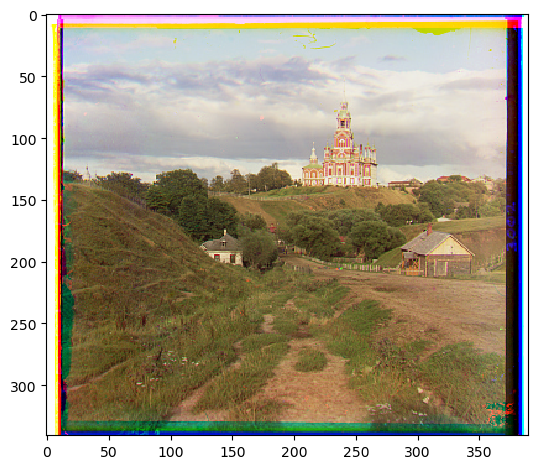

In [15]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio

def ncc_score(a, b):
    """Normalized cross correlation between two same-shaped arrays."""
    a0 = a - a.mean()
    b0 = b - b.mean()
    den = (np.linalg.norm(a0) * np.linalg.norm(b0)) + 1e-10
    return float((a0 * b0).sum() / den)

def center_crop(img, frac=0.10):
    """Crop frac from each side to avoid borders when scoring."""
    h, w = img.shape[:2]
    diffH = int(h * frac)
    diffW = int(w * frac)
    return img[diffH:h-diffH, diffW:w-diffW]

def align(moving, base, radius=15, crop_frac=0.10, verbose=True):
    """
    Align 'moving' to 'base' by exhaustive NCC search in [-radius, radius]^2.
    Returns the shifted 'moving' and the (dy, dx) displacement.
    """
    # work on grayscale float2D (these plates are already single-channel)
    base_c = center_crop(base, crop_frac)
    best = -1.0
    best_shift = (0, 0)

    for dy in range(-radius, radius + 1):
        for dx in range(-radius, radius + 1):
            cand = np.roll(moving, shift=(dy, dx), axis=(0, 1))
            cand_c = center_crop(cand, crop_frac)
            score = ncc_score(base_c, cand_c)
            if score > best:
                best = score
                best_shift = (dy, dx)

    if verbose:
        print(f"Best shift (dy, dx) = {best_shift}, NCC={best:.6f}")

    aligned = np.roll(moving, shift=best_shift, axis=(0, 1))
    return aligned, best_shift

# name of the input file
path = "proj1_data/"
imname = 'cathedral.jpg'

# read in the image
im = skio.imread(path + imname)

# convert to float in [0,1]
im = sk.img_as_float(im)

# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels (BGR)
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

# align the images
SEARCH_RADIUS = 15      # tweak for image size
CROP_FRAC = 0.10       # 10% border ignored when scoring

ag, shift_g = align(g, b, radius=SEARCH_RADIUS, crop_frac=CROP_FRAC)
ar, shift_r = align(r, b, radius=SEARCH_RADIUS, crop_frac=CROP_FRAC)

print(f"[G aligned to B] shift = {shift_g}")
print(f"[R aligned to B] shift = {shift_r}")

# create a color image (RGB)
im_out = np.dstack([ar, ag, b])
im_out = np.clip(im_out, 0.0, 1.0)

# save the image
out_path = 'out_cathedral.jpg'
clipped = np.clip(im_out, 0, 1)
skio.imsave(out_path, (clipped * 255).astype(np.uint8))
print(f"Saved {out_path}")

# display the image
skio.imshow(im_out)
skio.show()

Processing monastery.jpg...
Best shift (dy, dx) = (-3, 2), NCC=0.939614
Best shift (dy, dx) = (3, 2), NCC=0.794061
 [G aligned to B] (-3, 2), [R aligned to B] (3, 2)
Saved outputs/aligned_monastery.jpg
Processing tobolsk.jpg...
Best shift (dy, dx) = (3, 3), NCC=0.920702
Best shift (dy, dx) = (6, 3), NCC=0.857429
 [G aligned to B] (3, 3), [R aligned to B] (6, 3)
Saved outputs/aligned_tobolsk.jpg
Processing cathedral.jpg...
Best shift (dy, dx) = (5, 2), NCC=0.960214
Best shift (dy, dx) = (12, 3), NCC=0.905650
 [G aligned to B] (5, 2), [R aligned to B] (12, 3)
Saved outputs/aligned_cathedral.jpg


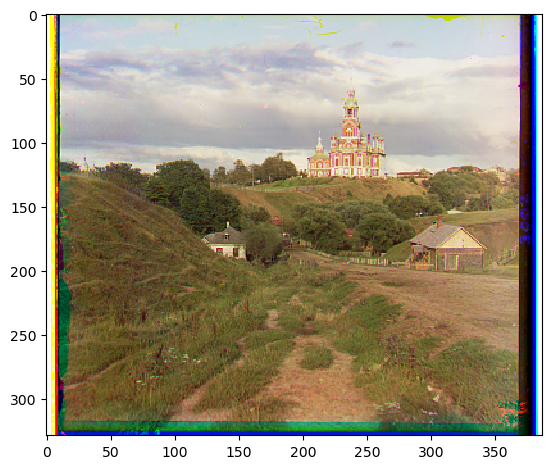

In [17]:
import os

path = "proj1_data/"
out_dir = "outputs/"
os.makedirs(out_dir, exist_ok=True)

# get all files ending with .jpg
files = [f for f in os.listdir(path) if f.endswith((".jpg"))]

def crop_dims(b, shifts):
    (dyg, dxg), (dyr, dxr) = shifts
    h, w = b.shape
    top    = max(0,  dyg,  dyr)
    left   = max(0,  dxg,  dxr)
    bottom = max(0, -dyg, -dyr)
    right  = max(0, -dxg, -dxr)
    return (slice(top, h-bottom), slice(left, w-right))

for fname in files:
    print(f"Processing {fname}...")
    im = skio.imread(os.path.join(path, fname))
    im = sk.img_as_float(im)

    height = im.shape[0] // 3
    b = im[:height]
    g = im[height:2*height]
    r = im[2*height:3*height]

    ag, shift_g = align(g, b)
    ar, shift_r = align(r, b)
    print(f" [G aligned to B] {shift_g}, [R aligned to B] {shift_r}")

    # Crop away the wrapping around
    ys, xs = crop_dims(b, [shift_g, shift_r])
    im_out = np.dstack([ar[ys, xs], ag[ys, xs], b[ys, xs]])
    im_out = np.clip(im_out, 0, 1)

    #im_out = np.dstack([ar, ag, b])
    #im_out = np.clip(im_out, 0.0, 1.0)

    out_path = os.path.join(out_dir, f"aligned_{fname}")
    skio.imsave(out_path, (im_out * 255).astype(np.uint8))
    print(f"Saved {out_path}")
    skio.imshow(im_out)

skio.show()

Processing emir.tif...
Best shift (dy, dx) = (15, 15), NCC=0.594697
Best shift (dy, dx) = (15, -4), NCC=0.210397
 [G aligned to B] (15, 15), [R aligned to B] (15, -4)
Saved outputs/aligned_emir.tif
Processing italil.tif...
Best shift (dy, dx) = (15, 15), NCC=0.831697
Best shift (dy, dx) = (15, 15), NCC=0.739888
 [G aligned to B] (15, 15), [R aligned to B] (15, 15)
Saved outputs/aligned_italil.tif
Processing church.tif...
Best shift (dy, dx) = (15, 4), NCC=0.865715
Best shift (dy, dx) = (15, -15), NCC=0.637231
 [G aligned to B] (15, 4), [R aligned to B] (15, -15)
Saved outputs/aligned_church.tif
Processing three_generations.tif...


KeyboardInterrupt: 

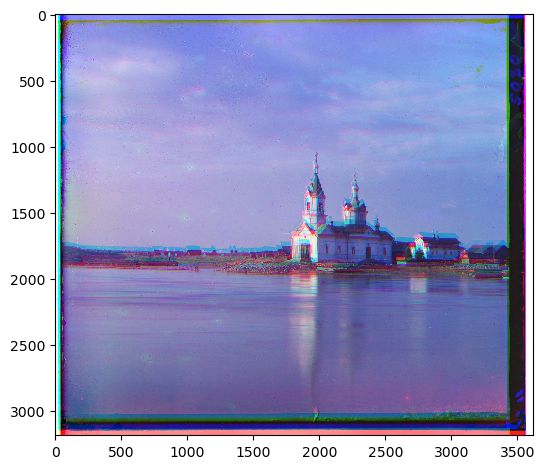

In [18]:
# Observing Large images with current exhaustive search method

import os

path = "proj1_data/"
out_dir = "outputs/"
os.makedirs(out_dir, exist_ok=True)

# get all files ending with .jpg
files = [f for f in os.listdir(path) if f.endswith((".tif"))]

def crop_dims(b, shifts):
    (dyg, dxg), (dyr, dxr) = shifts
    h, w = b.shape
    top    = max(0,  dyg,  dyr)
    left   = max(0,  dxg,  dxr)
    bottom = max(0, -dyg, -dyr)
    right  = max(0, -dxg, -dxr)
    return (slice(top, h-bottom), slice(left, w-right))

for fname in files:
    print(f"Processing {fname}...")
    im = skio.imread(os.path.join(path, fname))
    im = sk.img_as_float(im)

    height = im.shape[0] // 3
    b = im[:height]
    g = im[height:2*height]
    r = im[2*height:3*height]

    ag, shift_g = align(g, b)
    ar, shift_r = align(r, b)
    print(f" [G aligned to B] {shift_g}, [R aligned to B] {shift_r}")

    # Crop away the wrapping around
    ys, xs = crop_dims(b, [shift_g, shift_r])
    im_out = np.dstack([ar[ys, xs], ag[ys, xs], b[ys, xs]])
    im_out = np.clip(im_out, 0, 1)

    #im_out = np.dstack([ar, ag, b])
    #im_out = np.clip(im_out, 0.0, 1.0)

    out_path = os.path.join(out_dir, f"aligned_{fname}")
    skio.imsave(out_path, (im_out * 255).astype(np.uint8))
    print(f"Saved {out_path}")
    skio.imshow(im_out)

skio.show()

Processing emir.tif...
 [G aligned to B] (49, 24), [R aligned to B] (104, 56)
Saved outputs/pyramid_aligned_emir.jpg
Processing italil.tif...
 [G aligned to B] (38, 21), [R aligned to B] (76, 35)
Saved outputs/pyramid_aligned_italil.jpg
Processing monastery.jpg...
 [G aligned to B] (-3, 2), [R aligned to B] (3, 2)
Saved outputs/pyramid_aligned_monastery.jpg
Processing church.tif...
 [G aligned to B] (25, 4), [R aligned to B] (58, -4)
Saved outputs/pyramid_aligned_church.jpg
Processing three_generations.tif...
 [G aligned to B] (53, 14), [R aligned to B] (112, 11)
Saved outputs/pyramid_aligned_three_generations.jpg
Processing lugano.tif...
 [G aligned to B] (41, -16), [R aligned to B] (93, -29)
Saved outputs/pyramid_aligned_lugano.jpg
Processing melons.tif...
 [G aligned to B] (82, 11), [R aligned to B] (141, 13)
Saved outputs/pyramid_aligned_melons.jpg
Processing lastochikino.tif...
 [G aligned to B] (-3, -2), [R aligned to B] (75, -9)
Saved outputs/pyramid_aligned_lastochikino.jpg
Pro

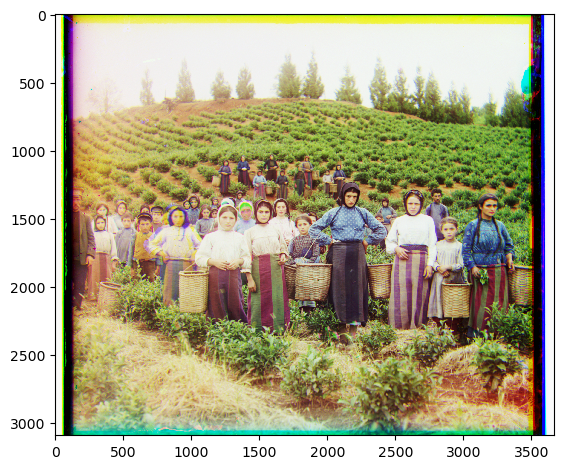

In [ ]:
# Implement Image Pyramid for speedup and improved results
import cv2

path = "proj1_data/"
out_dir = "outputs/"
os.makedirs(out_dir, exist_ok=True)

# get all files ending with .jpg and .tif
files = [f for f in os.listdir(path) if f.endswith((".tif", ".jpg"))]


def align_pyramid(channel, base, max_radius=15, crop_frac=0.1, levels=4):
    shift = (0, 0)

    # build pyramid with cv2.resize
    pyr_m = [channel]
    pyr_b = [base]
    for i in range(1, levels):
        scale = 1 / (2 ** i)
        pyr_m.append(cv2.resize(channel, (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
        pyr_b.append(cv2.resize(base,   (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
    pyr_m = pyr_m[::-1]
    pyr_b = pyr_b[::-1]

    for lvl, (m_lvl, b_lvl) in enumerate(zip(pyr_m, pyr_b)):
        if lvl > 0:
            shift = (shift[0]*2, shift[1]*2)

        # search small window at finer levels
        radius = max_radius if lvl == 0 else 3

        dy0, dx0 = shift
        best = -1.0
        best_shift = shift
        b_c = center_crop(b_lvl, crop_frac)

        for ddy in range(-radius, radius+1):
            for ddx in range(-radius, radius+1):
                cand = np.roll(m_lvl, (dy0+ddy, dx0+ddx), axis=(0, 1))
                c_c = center_crop(cand, crop_frac)
                score = ncc_score(b_c, c_c)
                if score > best:
                    best = score
                    best_shift = (dy0+ddy, dx0+ddx)
        shift = best_shift

    aligned = np.roll(channel, shift, axis=(0, 1))
    return aligned, shift

for fname in files:
    print(f"Processing {fname}...")
    im = skio.imread(os.path.join(path, fname))
    im = sk.img_as_float(im)

    height = im.shape[0] // 3
    b = im[:height]
    g = im[height:2*height]
    r = im[2*height:3*height]

    ag, shift_g = align_pyramid(g, b, max_radius=15, levels=4)
    ar, shift_r = align_pyramid(r, b, max_radius=15, levels=4)
    print(f" [G aligned to B] {shift_g}, [R aligned to B] {shift_r}")

    # Crop away the wrapping around
    ys, xs = crop_dims(b, [shift_g, shift_r])
    im_out = np.dstack([ar[ys, xs], ag[ys, xs], b[ys, xs]])
    im_out = np.clip(im_out, 0, 1)

    #im_out = np.dstack([ar, ag, b])
    #im_out = np.clip(im_out, 0.0, 1.0)

    fname = fname.split('.')[0]

    out_path = os.path.join(out_dir, f"pyramid_aligned_{fname}.jpg")
    skio.imsave(out_path, (im_out * 255).astype(np.uint8))
    print(f"Saved {out_path}")
    skio.imshow(im_out)

skio.show()

Processing emir.tif...
 [G aligned to B] (49, 24), [R aligned to B] (104, 56)
Saved outputs/pyramid_and_border_aligned_emir.jpg
Processing italil.tif...
 [G aligned to B] (38, 21), [R aligned to B] (76, 35)
Saved outputs/pyramid_and_border_aligned_italil.jpg
Processing monastery.jpg...
 [G aligned to B] (-3, 2), [R aligned to B] (3, 2)
Saved outputs/pyramid_and_border_aligned_monastery.jpg
Processing church.tif...
 [G aligned to B] (25, 4), [R aligned to B] (58, -4)
Saved outputs/pyramid_and_border_aligned_church.jpg
Processing three_generations.tif...
 [G aligned to B] (53, 14), [R aligned to B] (112, 11)
Saved outputs/pyramid_and_border_aligned_three_generations.jpg
Processing lugano.tif...
 [G aligned to B] (41, -16), [R aligned to B] (93, -29)
Saved outputs/pyramid_and_border_aligned_lugano.jpg
Processing melons.tif...
 [G aligned to B] (82, 11), [R aligned to B] (141, 13)
Saved outputs/pyramid_and_border_aligned_melons.jpg
Processing lastochikino.tif...
 [G aligned to B] (-3, -2),

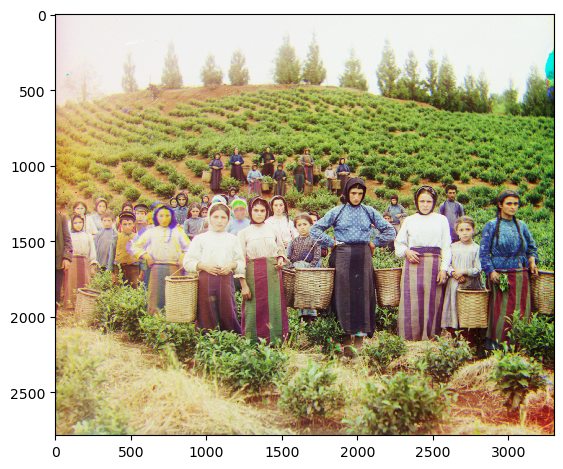

In [23]:
# Implement Image Pyramid for speedup and improved results
import cv2

path = "proj1_data/"
out_dir = "outputs/"
os.makedirs(out_dir, exist_ok=True)

# get all files ending with .jpg and .tif
files = [f for f in os.listdir(path) if f.endswith((".tif", ".jpg"))]

def align_pyramid(channel, base, max_radius=15, crop_frac=0.1, levels=4):
    shift = (0, 0)

    # build pyramid with cv2.resize
    pyr_m = [channel]
    pyr_b = [base]
    for i in range(1, levels):
        scale = 1 / (2 ** i)
        pyr_m.append(cv2.resize(channel, (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
        pyr_b.append(cv2.resize(base,   (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
    pyr_m = pyr_m[::-1]
    pyr_b = pyr_b[::-1]

    for lvl, (m_lvl, b_lvl) in enumerate(zip(pyr_m, pyr_b)):
        if lvl > 0:
            shift = (shift[0]*2, shift[1]*2)

        # search small window at finer levels
        radius = max_radius if lvl == 0 else 3

        dy0, dx0 = shift
        best = -1.0
        best_shift = shift
        b_c = center_crop(b_lvl, crop_frac)

        for ddy in range(-radius, radius+1):
            for ddx in range(-radius, radius+1):
                cand = np.roll(m_lvl, (dy0+ddy, dx0+ddx), axis=(0, 1))
                c_c = center_crop(cand, crop_frac)
                score = ncc_score(b_c, c_c)
                if score > best:
                    best = score
                    best_shift = (dy0+ddy, dx0+ddx)
        shift = best_shift

    aligned = np.roll(channel, shift, axis=(0, 1))
    return aligned, shift

for fname in files:
    print(f"Processing {fname}...")
    im = skio.imread(os.path.join(path, fname))
    im = sk.img_as_float(im)

    height = im.shape[0] // 3
    b = im[:height]
    g = im[height:2*height]
    r = im[2*height:3*height]

    ag, shift_g = align_pyramid(g, b, max_radius=15, levels=4)
    ar, shift_r = align_pyramid(r, b, max_radius=15, levels=4)
    print(f" [G aligned to B] {shift_g}, [R aligned to B] {shift_r}")

    # Crop away the wrapping around
    ys, xs = crop_dims(b, [shift_g, shift_r])
    im_out = np.dstack([ar[ys, xs], ag[ys, xs], b[ys, xs]])
    im_out = np.clip(im_out, 0, 1)

    def extra_crop(img, frac=0.05):
        h, w, c = img.shape
        return img[int(h*frac):-int(h*frac), int(w*frac):-int(w*frac)]

    im_out = extra_crop(im_out, frac=0.05)

    fname = fname.split('.')[0]

    out_path = os.path.join(out_dir, f"pyramid_and_border_aligned_{fname}.jpg")
    skio.imsave(out_path, (im_out * 255).astype(np.uint8))
    print(f"Saved {out_path}")
    skio.imshow(im_out)

skio.show()

In [ ]:
# Extra Images selected from the collection

import cv2

path = "extra_imgs/"
out_dir = "outputs/"
os.makedirs(out_dir, exist_ok=True)

# get all files ending with .jpg and .tif
files = [f for f in os.listdir(path) if f.endswith((".tif", ".jpg"))]

def align_pyramid(channel, base, max_radius=15, crop_frac=0.1, levels=4):
    shift = (0, 0)

    # build pyramid with cv2.resize
    pyr_m = [channel]
    pyr_b = [base]
    for i in range(1, levels):
        scale = 1 / (2 ** i)
        pyr_m.append(cv2.resize(channel, (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
        pyr_b.append(cv2.resize(base,   (0,0), fx=scale, fy=scale,
                                interpolation=cv2.INTER_AREA))
    pyr_m = pyr_m[::-1]
    pyr_b = pyr_b[::-1]

    for lvl, (m_lvl, b_lvl) in enumerate(zip(pyr_m, pyr_b)):
        if lvl > 0:
            shift = (shift[0]*2, shift[1]*2)

        # search small window at finer levels
        radius = max_radius if lvl == 0 else 3

        dy0, dx0 = shift
        best = -1.0
        best_shift = shift
        b_c = center_crop(b_lvl, crop_frac)

        for ddy in range(-radius, radius+1):
            for ddx in range(-radius, radius+1):
                cand = np.roll(m_lvl, (dy0+ddy, dx0+ddx), axis=(0, 1))
                c_c = center_crop(cand, crop_frac)
                score = ncc_score(b_c, c_c)
                if score > best:
                    best = score
                    best_shift = (dy0+ddy, dx0+ddx)
        shift = best_shift

    aligned = np.roll(channel, shift, axis=(0, 1))
    return aligned, shift

for fname in files:
    print(f"Processing {fname}...")
    im = skio.imread(os.path.join(path, fname))
    im = sk.img_as_float(im)

    height = im.shape[0] // 3
    b = im[:height]
    g = im[height:2*height]
    r = im[2*height:3*height]

    ag, shift_g = align_pyramid(g, b, max_radius=15, levels=4)
    ar, shift_r = align_pyramid(r, b, max_radius=15, levels=4)
    print(f" [G aligned to B] {shift_g}, [R aligned to B] {shift_r}")

    # Crop away the wrapping around
    ys, xs = crop_dims(b, [shift_g, shift_r])
    im_out = np.dstack([ar[ys, xs], ag[ys, xs], b[ys, xs]])
    im_out = np.clip(im_out, 0, 1)

    def extra_crop(img, frac=0.05):
        h, w, c = img.shape
        return img[int(h*frac):-int(h*frac), int(w*frac):-int(w*frac)]

    im_out = extra_crop(im_out, frac=0.05)

    fname = fname.split('.')[0]

    out_path = os.path.join(out_dir, f"pyramid_and_border_aligned_{fname}.jpg")
    skio.imsave(out_path, (im_out * 255).astype(np.uint8))
    print(f"Saved {out_path}")
    skio.imshow(im_out)

skio.show()